In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# recent_data = np.loadtxt('../logs/log_pid_1686177622.csv',delimiter=',',dtype=float)
# recent_data = np.loadtxt('../logs/log_pid_1686179008.csv',delimiter=',',dtype=float)
# recent_data = np.loadtxt('../logs/log_pid_1686179926.csv',delimiter=',',dtyp10e=float)
pid_fixed = np.loadtxt('../logs/log_pid_1686200167.csv',delimiter=',',dtype=float)
pid_fixed[:, 0] -= pid_fixed[0, 0]

oo_fixed = np.loadtxt('../logs/log_io_1686200588.csv',delimiter=',',dtype=float)
oo_fixed[:, 0] -= oo_fixed[0, 0]

miac_fixed = np.loadtxt('../logs/log_miac_1686201624.csv',delimiter=',',dtype=float)
miac_fixed[:, 0] -= miac_fixed[0, 0]

mpc_fixed = np.loadtxt('../logs/log_mpc_1686202158.csv',delimiter=',',dtype=float)
mpc_fixed[:, 0] -= mpc_fixed[0, 0]

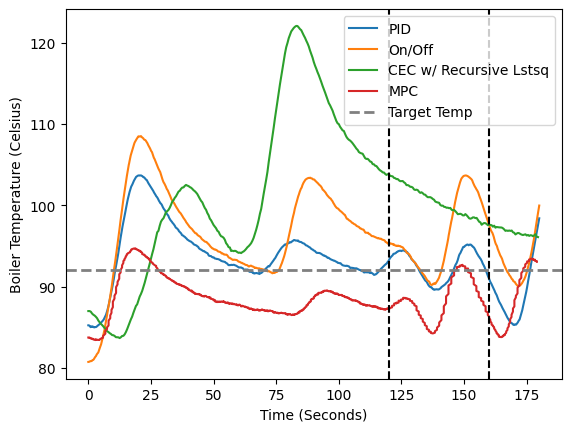

In [56]:
plt.plot(pid_fixed[:, 0], pid_fixed[:, 1], label="PID")
plt.plot(oo_fixed[:, 0], oo_fixed[:, 1], label="On/Off")
plt.plot(miac_fixed[:, 0], miac_fixed[:, 1], label="CEC w/ Recursive Lstsq")
plt.plot(mpc_fixed[:, 0], mpc_fixed[:, 1], label="MPC")
plt.axhline(92, linestyle='--', linewidth=2, color='gray', label="Target Temp")
plt.axvline(120, linestyle='--', color='black')
plt.axvline(160, linestyle='--', color='black')
plt.xlabel('Time (Seconds)')
plt.ylabel('Boiler Temperature (Celsius)')
plt.legend()
plt.show()

In [60]:
160*4

640

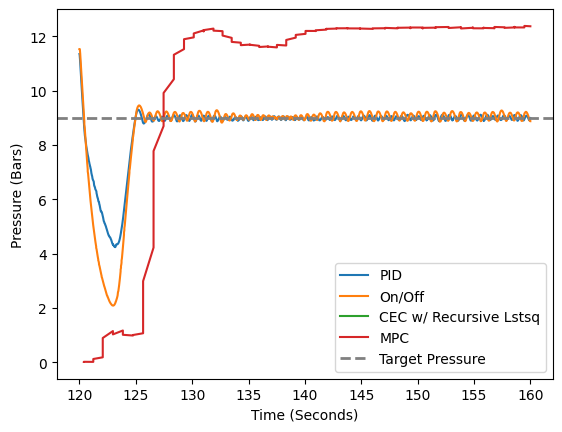

In [64]:
plt.plot(pid_fixed[7200:9600, 0], pid_fixed[7200:9600, 2], label="PID")
plt.plot(oo_fixed[7200:9600, 0], oo_fixed[7200:9600, 2], label="On/Off")
plt.plot(miac_fixed[480:640, 0], miac_fixed[480:640, 2], label="CEC w/ Recursive Lstsq")
plt.plot(mpc_fixed[480:640, 0], mpc_fixed[480:640, 2], label="MPC")
plt.axhline(9, linestyle='--', linewidth=2, color='gray', label="Target Pressure")
plt.xlabel('Time (Seconds)')
plt.ylabel('Pressure (Bars)')
plt.legend()
plt.show()

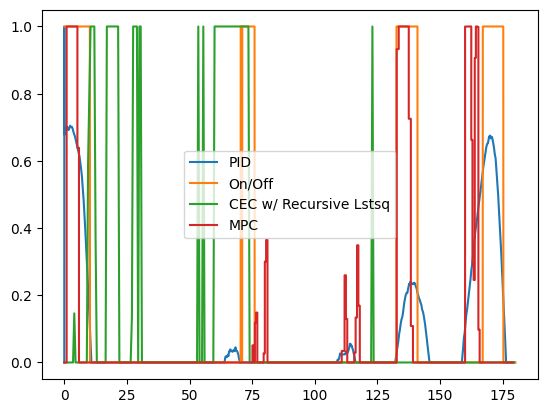

In [50]:
plt.plot(pid_fixed[:, 0], pid_fixed[:, 3], label="PID")
plt.plot(oo_fixed[:, 0], oo_fixed[:, 3], label="On/Off")
plt.plot(miac_fixed[:, 0], miac_fixed[:, 3], label="CEC w/ Recursive Lstsq")
plt.plot(mpc_fixed[:, 0], mpc_fixed[:, 3], label="MPC")
plt.legend()
plt.show()

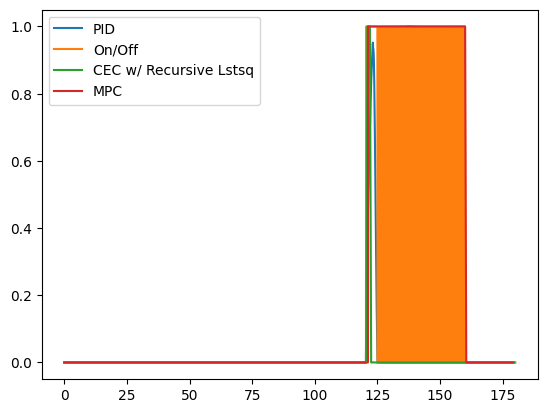

In [51]:
plt.plot(pid_fixed[:, 0], pid_fixed[:, 4], label="PID")
plt.plot(oo_fixed[:, 0], oo_fixed[:, 4], label="On/Off")
plt.plot(miac_fixed[:, 0], miac_fixed[:, 4], label="CEC w/ Recursive Lstsq")
plt.plot(mpc_fixed[:, 0], mpc_fixed[:, 4], label="MPC")
plt.legend()
plt.show()

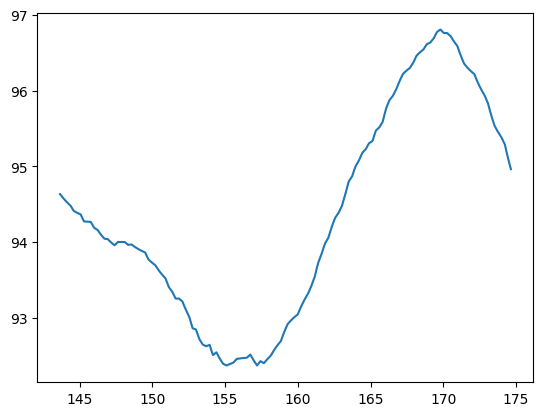

In [34]:
plt.plot(recent_data[pump_on:pump_off, 0], recent_data[pump_on:pump_off, 1])
plt.show()